In [1]:
# import libraries
import pandas as pd
import sklearn
import numpy as np

In [2]:
# import dataset

df_1 = pd.read_csv('D:/Github/Data-Science-Bootcamp/Another-Simple-Classification-Exercise/bank.csv')

In [3]:
df_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
#checking available features
df_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
# checking whether output value is more or less balanced
df_1.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [11]:
type(list(df_1.columns))

list

In [18]:
# check value_counts of all other features

for col in list(df_1.columns):
    print(df_1[col].value_counts())

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
90      2
89      1
95      1
Name: age, Length: 76, dtype: int64
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
no     10994
yes      168
Name: default, dtype: int64
0       774
1        39
3        35
2        34
4        29
       ... 
4641      1
2975      1
918       1
2959      1
7561      1
Name: balance, Length: 3805, dtype: int64
no     5881
yes    5281
Name: housing, dtype: int64
no     9702
yes    1460
Name: loan, dtype: int64
cellular     8042
unknown      2346
telephone     774
Na

In [21]:
df_balance = df_1.sort_values('balance', ascending=False)
df_balance.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
3043,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
8208,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0,unknown,no
10143,43,admin.,single,secondary,no,56831,no,no,unknown,15,may,243,1,-1,0,unknown,no
2468,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,10,aug,290,1,-1,0,unknown,yes
3236,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,15,feb,394,3,189,1,success,yes
10585,56,entrepreneur,married,tertiary,no,51439,no,yes,cellular,8,jul,325,1,-1,0,unknown,no
4210,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
6994,75,retired,divorced,primary,no,37127,no,no,cellular,11,feb,505,1,-1,0,unknown,no
10768,51,entrepreneur,married,tertiary,no,36935,yes,no,cellular,21,nov,41,1,-1,0,unknown,no


In [23]:
df_duration = df_1.sort_values('duration', ascending=False)
df_duration.tail(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6379,30,admin.,married,secondary,no,4,no,no,unknown,20,jun,7,2,-1,0,unknown,no
9863,25,blue-collar,single,secondary,no,84,yes,no,cellular,18,may,6,2,-1,0,unknown,no
8939,46,self-employed,divorced,secondary,no,0,no,no,unknown,10,aug,6,1,-1,0,unknown,no
6977,29,unemployed,single,secondary,no,670,yes,no,unknown,26,sep,6,1,-1,0,unknown,no
7851,23,blue-collar,single,secondary,no,0,yes,no,cellular,8,may,6,5,350,2,failure,no
8990,28,blue-collar,married,secondary,no,0,yes,no,cellular,15,may,6,4,-1,0,unknown,no
9875,22,management,single,tertiary,no,760,no,no,telephone,7,dec,6,1,-1,0,unknown,no
10177,38,management,single,tertiary,no,8669,yes,no,telephone,20,apr,5,3,150,6,failure,no
8003,48,technician,married,secondary,no,10655,no,no,telephone,31,jul,5,3,-1,0,unknown,no
10819,34,management,divorced,tertiary,no,70,yes,no,unknown,22,jul,5,1,701,6,other,no


In [25]:
#checking for NaN values - wowwwwwwwwwww
df_duration.isnull().sum().sum()

0

In [32]:
# converting output value to numeric
df_1['final'] = pd.Series([1 if x=='yes' else 0 for x in df_1['deposit']])

In [35]:
#dropping old output value column

df_2 = df_1.drop(['deposit'], axis=1)

               age   balance       day  duration  campaign     pdays  \
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774   
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411   
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232   
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392   
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726   
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000   
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272   
final     0.034901  0.081129 -0.056326  0.451919 -0.128081  0.151593   

          previous     final  
age       0.020169  0.034901  
balance   0.030805  0.081129  
day      -0.058981 -0.056326  
duration -0.026716  0.451919  
campaign -0.049699 -0.128081  
pdays     0.507272  0.151593  
previous  1.000000  0.139867  
final     0.139867  1.000000  


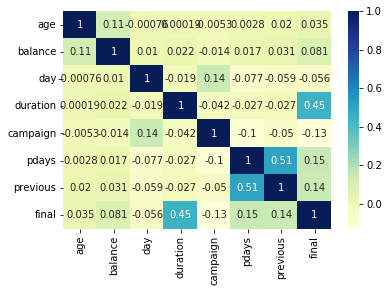

In [36]:
import seaborn as sns
import matplotlib.pyplot as mp

print(df_2.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df_2.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

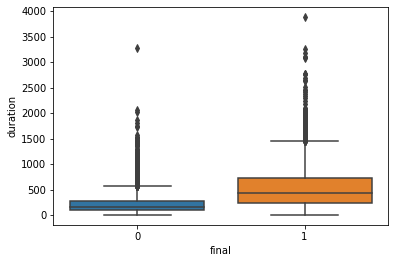

In [39]:
ax = sns.boxplot(y='duration', x='final', data=df_2)
mp.show()

Weblinks to save:


https://blogs.oracle.com/ai-and-datascience/post/an-introduction-to-building-a-classification-model-using-random-forests-in-python


https://medium.com/analytics-vidhya/building-classification-model-with-python-9bdfc13faa4b


https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226


https://www.activestate.com/resources/quick-reads/how-to-classify-data-in-python/


https://builtin.com/data-science/evaluating-classification-models


https://openclassrooms.com/en/courses/6389626-train-a-supervised-machine-learning-model/6405911-build-and-evaluate-a-classification-model